In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from CASutils import qbo_utils as qbo
from CASutils import plotting_utils as myplots
from CASutils import colorbar_utils as cbars
from CASutils import plothisto_utils as histo

In [2]:
plotpath="/project/cas/islas/python_plots/CAM7_vertres_paper/FIGURES/SUPP/"

In [3]:
basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/QBOcomposites/90day_beforeW_powerspec/"

In [4]:
era5_50 = xr.open_dataset(basepath+'ERA5_50hpa_5S5N_90days.nc')
dz800_50 = xr.open_dataset(basepath+'dz800_50hpa_5S5N_80km.nc')
dz700_50 = xr.open_dataset(basepath+'dz700_50hpa_5S5N_80km.nc')
dz600_50 = xr.open_dataset(basepath+'dz600_50hpa_5S5N_80km.nc')
dz500_50 = xr.open_dataset(basepath+'dz500_50hpa_5S5N_80km.nc')

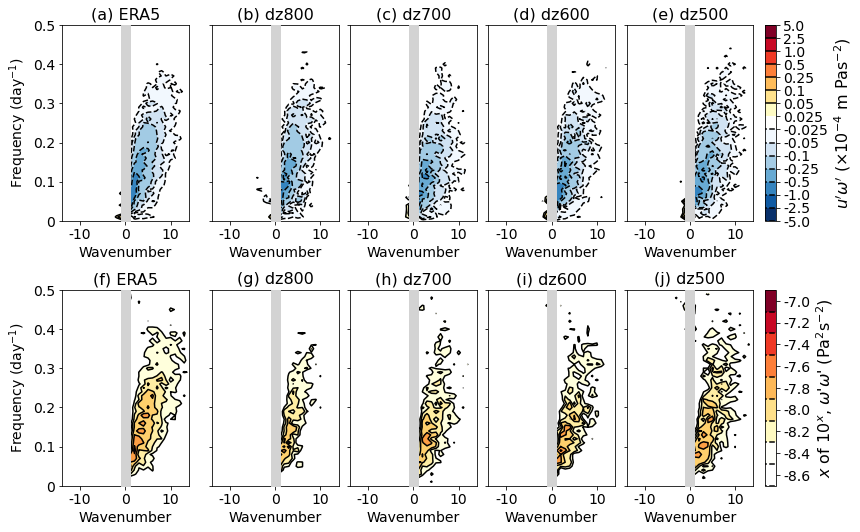

In [5]:
fig = plt.figure(figsize=(16,16))

ci = 1e-6 ; cmin=-1e-5 ; cmax=1e-5
component='symmetric'

#---non-linear contour interval for u'w'
cvals=[-0.0005,-0.00025,-0.0001,-0.00005,-0.000025,-0.00001,-0.000005,-0.0000025,
                0.0000025,0.000005,0.00001,0.000025,0.00005,0.0001,0.00025,0.0005]
cvals_cbar=[ i*10000 for i in cvals ]
ticks=[-5.0,-2.5,-1.0,-0.5,-0.25,-0.1,-0.05,-0.025,0.025,0.05,0.1,0.25,0.5,1.0,2.5,5.0]


xlim=14
ax = myplots.plotWK(fig, era5_50.cospec_uw.sel(component=component).mean('icomp'), era5_50.k, era5_50.w, ci, cmin, cmax,
                    '(a) ERA5',0,0.11,0.8,0.97,contourlinescale=2, cmap='blue2red', xlim=[-1*xlim, xlim],
                    speclevs=cvals)

ax = myplots.plotWK(fig, dz800_50.cospec_uw.sel(component=component).mean('icomp'), dz800_50.k, dz800_50.w, ci, -1.*cmax, cmax,
                    '(b) dz800',0.13,0.24,0.8,0.97, ylabel=False, contourlinescale=2, cmap='blue2red', xlim=[-1*xlim, xlim],
                    speclevs=cvals)

ax = myplots.plotWK(fig, dz700_50.cospec_uw.sel(component=component).mean('icomp'), dz700_50.k, dz700_50.w, ci, -1.*cmax, cmax,
                    '(c) dz700',0.25,0.36,0.8,0.97, ylabel=False, contourlinescale=2, cmap='blue2red', xlim=[-1*xlim, xlim],
                    speclevs=cvals)

ax = myplots.plotWK(fig, dz600_50.cospec_uw.sel(component=component).mean('icomp'), dz600_50.k, dz600_50.w, ci, -1.*cmax, cmax,
                    '(d) dz600',0.37,0.48,0.8,0.97, ylabel=False, contourlinescale=2, cmap='blue2red', xlim=[-1*xlim, xlim],
                    speclevs=cvals)

ax = myplots.plotWK(fig, dz500_50.cospec_uw.sel(component=component).mean('icomp'), dz500_50.k, dz500_50.w, ci, -1.*cmax, cmax,
                    '(e) dz500',0.49,0.6,0.8,0.97, ylabel=False, contourlinescale=2, cmap='blue2red', xlim=[-1*xlim, xlim],
                    speclevs=cvals)

ax = cbars.plotcolorbar_sayc(fig, cvals_cbar,"$u'\omega'$ ($\\times$10$^{-4}$ m Pas$^{-2}$)",0.61,0.62,0.8,0.97,orient='vertical', ticks=ticks,
                            contourlines=True, fsize=14)


#----W power spectrum 50hPa
ci=0.2 ; cmin=-8.6 ; cmax=-7

ax = myplots.plotWK(fig, np.log10(era5_50.cospec_ww.sel(component=component).mean('icomp')), era5_50.k, era5_50.w, ci, cmin, cmax,
                    '(f) ERA5',0.,0.11,0.57,0.74,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True)

ax = myplots.plotWK(fig, np.log10(dz800_50.cospec_ww.sel(component=component).mean('icomp')), dz800_50.k, dz800_50.w, ci, cmin, cmax,
                    '(g) dz800',0.13,0.24,0.57,0.74,ylabel=False, contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True)

ax = myplots.plotWK(fig, np.log10(dz700_50.cospec_ww.sel(component=component).mean('icomp')), dz700_50.k, dz700_50.w, ci, cmin, cmax,
                    '(h) dz700',0.25,0.36,0.57,0.74,ylabel=False, contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True)

ax = myplots.plotWK(fig, np.log10(dz600_50.cospec_ww.sel(component=component).mean('icomp')), dz600_50.k, dz600_50.w, ci, cmin, cmax,
                    '(i) dz600',0.37,0.48,0.57,0.74,ylabel=False, contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True)

ax = myplots.plotWK(fig, np.log10(dz500_50.cospec_ww.sel(component=component).mean('icomp')), dz500_50.k, dz500_50.w, ci, cmin, cmax,
                    '(j) dz500',0.49,0.6,0.57,0.74,ylabel=False, contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True)

ax = cbars.plotcolorbar_log10(fig, ci, cmin, cmax,"$x$ of 10$^{x}$, $\omega$'$\omega$' (Pa$^{2}$s$^{-2}$)", 0.61,0.62,0.57,0.74,orient='vertical', contourlines=True,
                              posonly=True, ticklabel10=False, fsize=14)


fig.savefig(plotpath+"/figS8.pdf", bbox_inches='tight', facecolor='white')


In [15]:
print(dz800_50.cospec_uw.sel(component=component).mean('icomp').where(dz800_50.k > 0, drop=True).sum(['k','w']).values)
print(dz700_50.cospec_uw.sel(component=component).mean('icomp').where(dz700_50.k > 0, drop=True).sum(['k','w']).values)
print(dz600_50.cospec_uw.sel(component=component).mean('icomp').where(dz600_50.k > 0, drop=True).sum(['k','w']).values)
print(dz500_50.cospec_uw.sel(component=component).mean('icomp').where(dz500_50.k > 0, drop=True).sum(['k','w']).values)

-0.003577450254235206
-0.0035652421718780675
-0.0036536311277273834
-0.003936896151107559


In [7]:
dz800_50

<xarray.Dataset>
Dimensions:    (time: 100, icomp: 9, w: 50, k: 289, component: 2)
Coordinates:
    zlon       float64 ...
    ilev       float64 ...
  * time       (time) int64 -95 -94 -93 -92 -91 -90 -89 -88 ... -2 -1 0 1 2 3 4
    pre        int32 ...
    daystr     (icomp, time) <U5 ...
  * w          (w) float64 0.0 0.01 0.02 0.03 0.04 ... 0.45 0.46 0.47 0.48 0.49
  * k          (k) int64 -144 -143 -142 -141 -140 -139 ... 140 141 142 143 144
  * component  (component) <U13 'symmetric' 'antisymmetric'
Dimensions without coordinates: icomp
Data variables:
    uzm        (icomp, time) float64 ...
    epfz       (icomp, time) float64 ...
    UWzm_E     (icomp, time) float64 ...
    cospec_uw  (icomp, component, w, k) float64 ...
    cospec_uu  (icomp, component, w, k) float64 ...
    cospec_ww  (icomp, component, w, k) float64 ...